In [20]:
import pandas as pd   
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
import warnings
warnings.filterwarnings("ignore")


In [22]:
from Functions import *

In [23]:
file = 'D:\\DSEB 63 - NEU\\Năm BA\\Visualization\\Data\\Data\\dseb63_final_project_DP_dataset\\dseb63_application_train.csv'
df = pd.read_csv(file,index_col = 0)

In [24]:
df.head(5)

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,SK_ID_CURR
0,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,278621
1,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,139008
2,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,138348
3,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,454500.0,...,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0,64140
4,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,1530000.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,219374


In [25]:
df.shape

(246009, 122)

In [26]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246009 entries, 0 to 246008
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    TARGET                        int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DA

# Pre chech overall data

In [27]:
app_check = pre_check_tool(df = df)

In [28]:
app_check.check_per_null()

,number_missing,percent_missing
COMMONAREA_MEDI,171930,69.887687
COMMONAREA_AVG,171930,69.887687
COMMONAREA_MODE,171930,69.887687
NONLIVINGAPARTMENTS_MEDI,170869,69.456402
NONLIVINGAPARTMENTS_MODE,170869,69.456402
...,...,...
EXT_SOURCE_2,529,0.215033
AMT_GOODS_PRICE,224,0.091054
AMT_ANNUITY,10,0.004065
DAYS_LAST_PHONE_CHANGE,1,0.000406


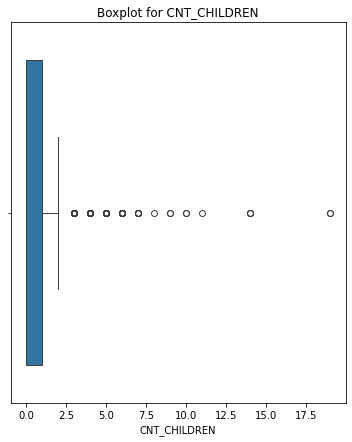

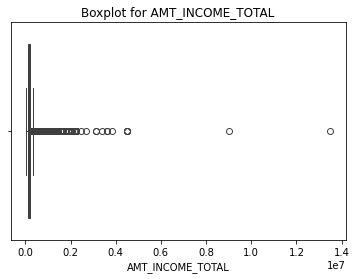

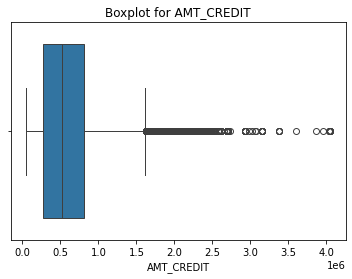

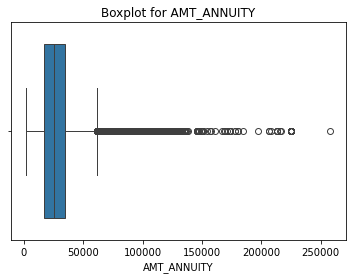

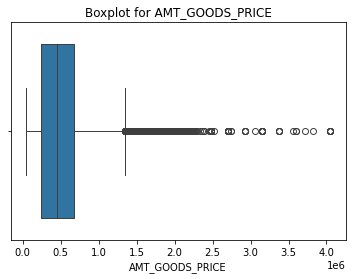

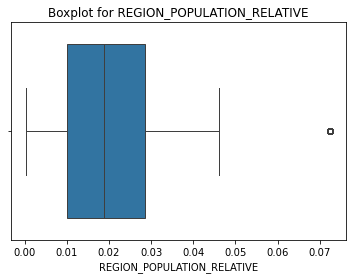

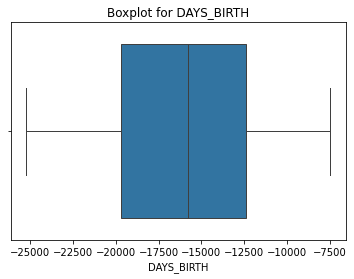

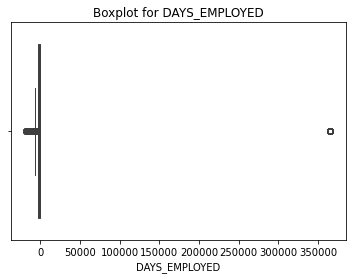

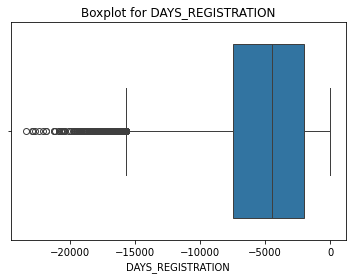

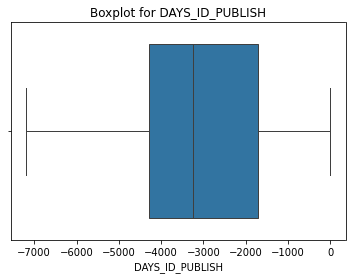

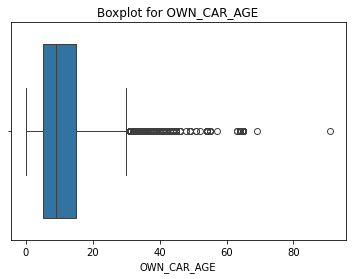

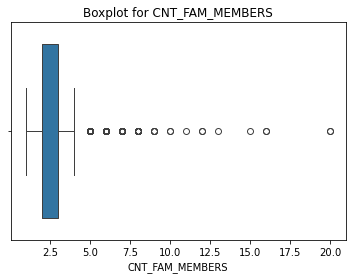

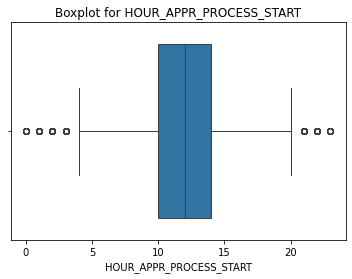

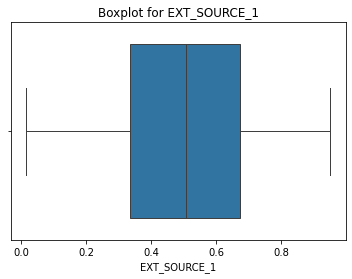

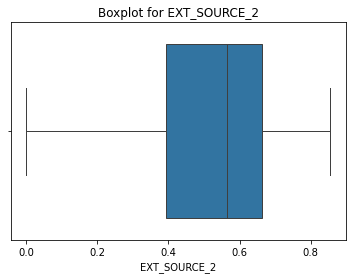

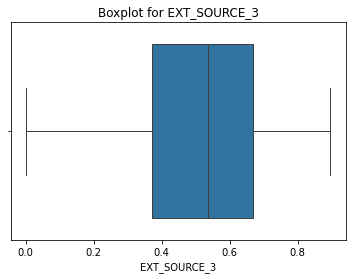

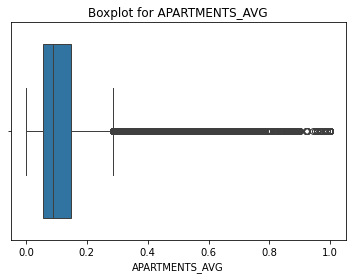

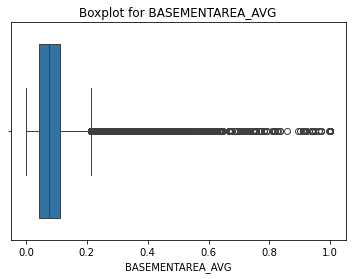

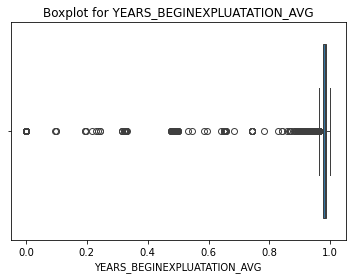

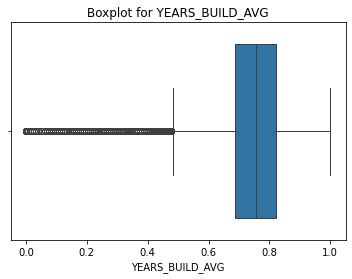

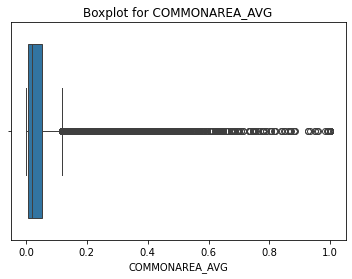

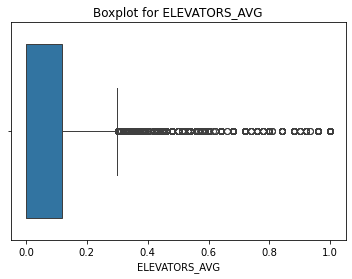

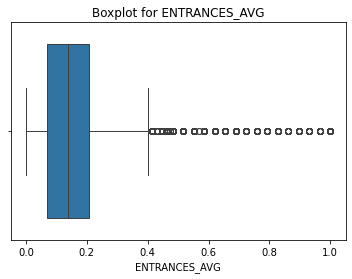

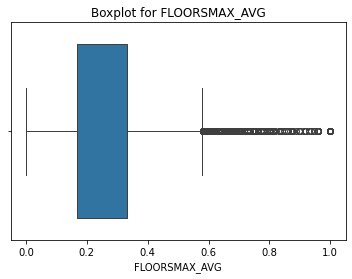

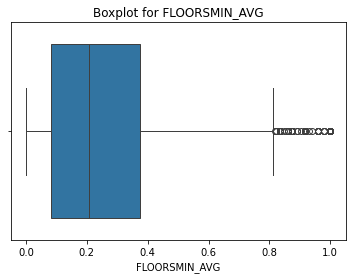

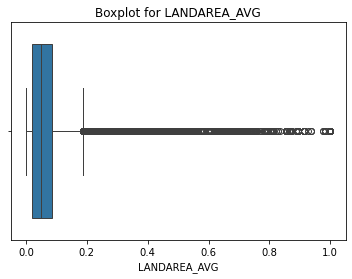

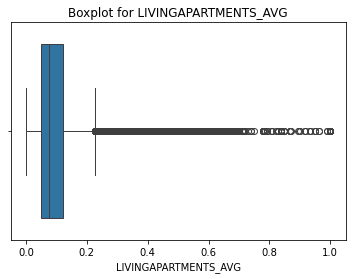

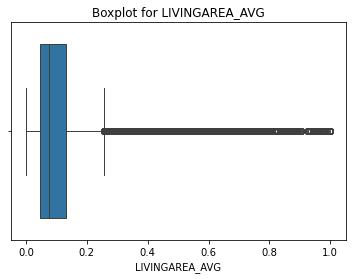

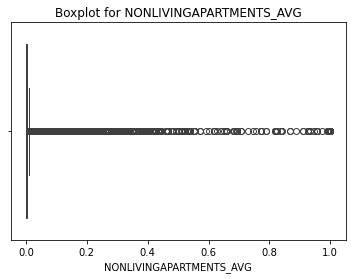

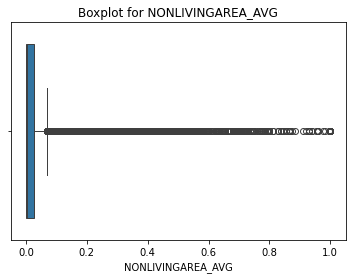

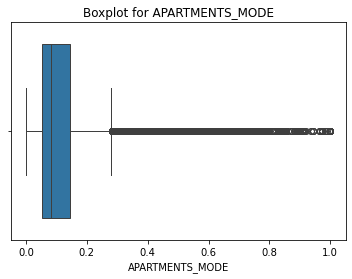

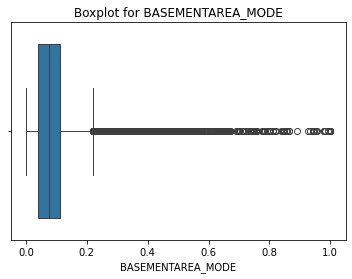

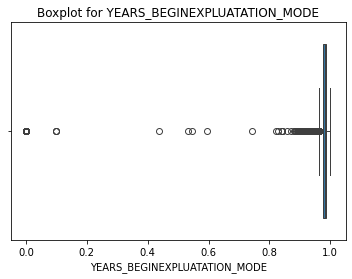

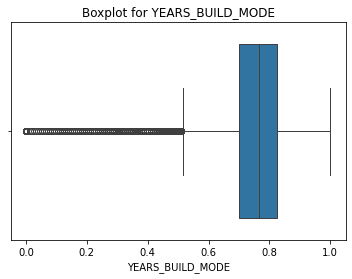

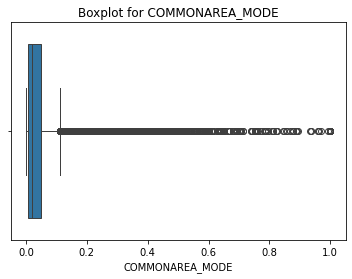

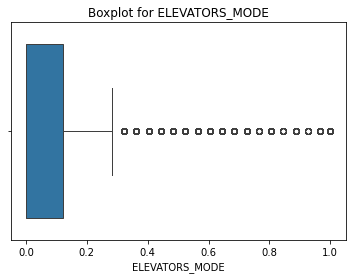

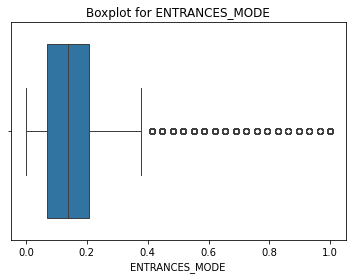

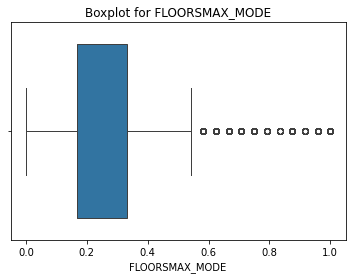

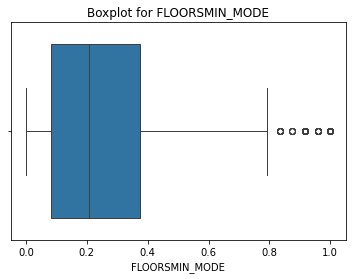

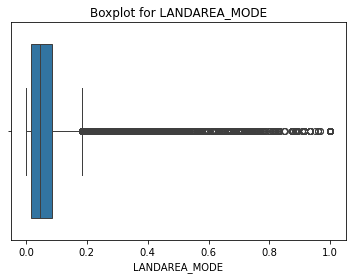

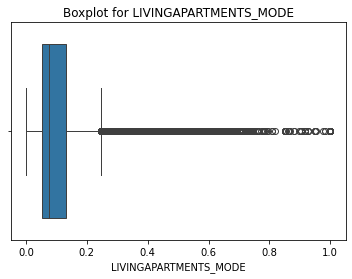

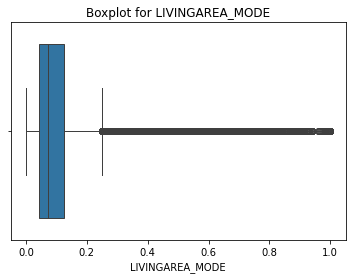

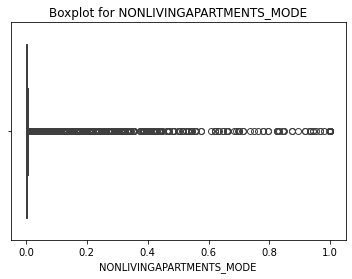

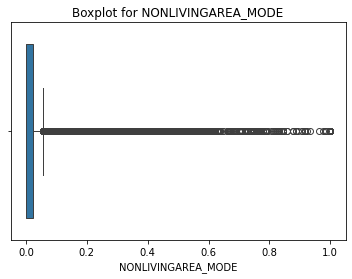

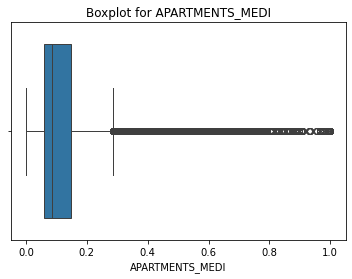

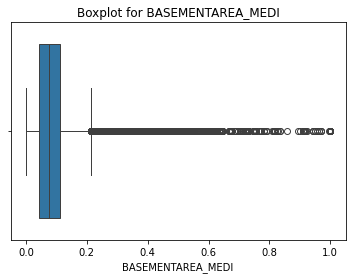

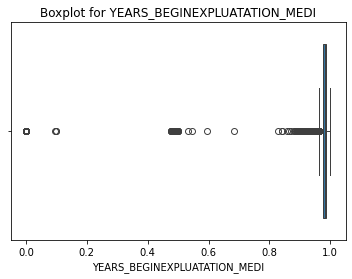

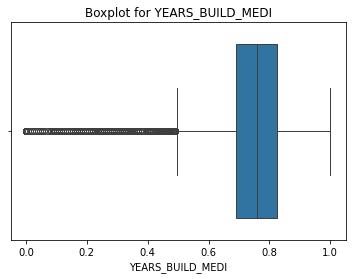

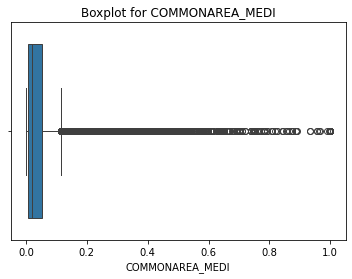

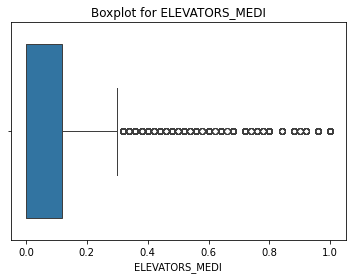

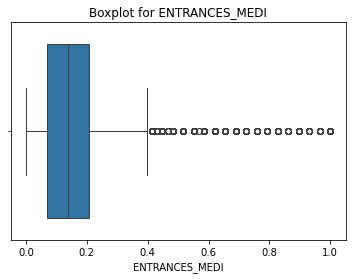

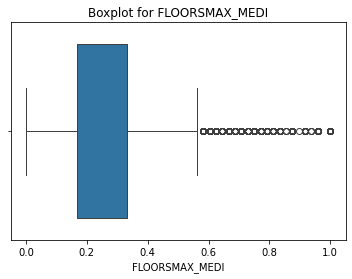

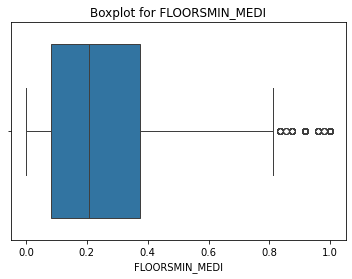

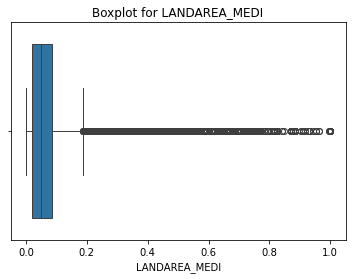

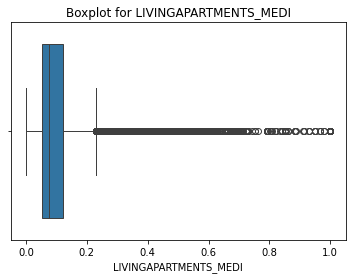

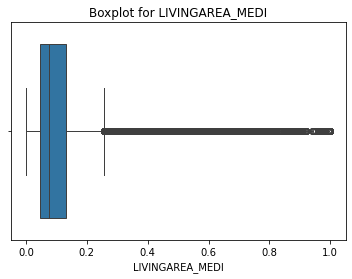

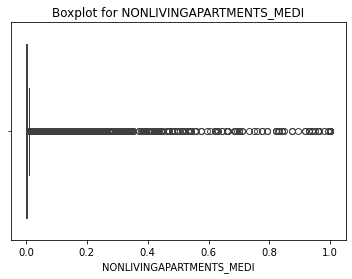

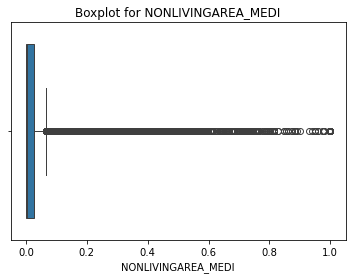

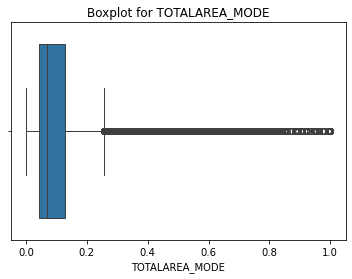

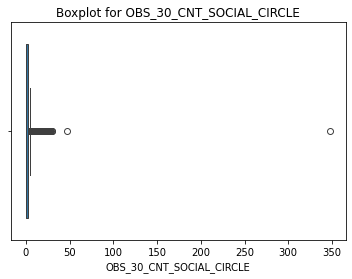

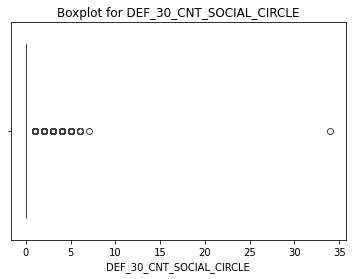

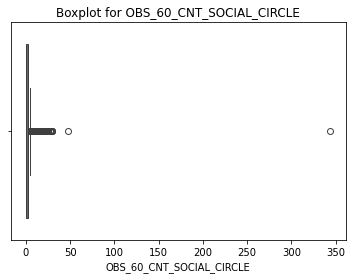

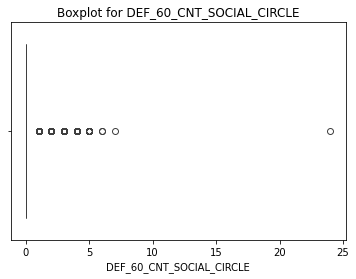

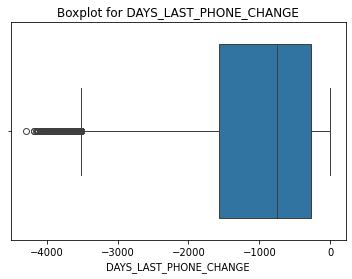

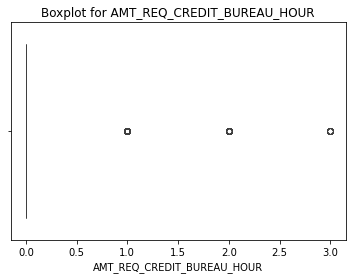

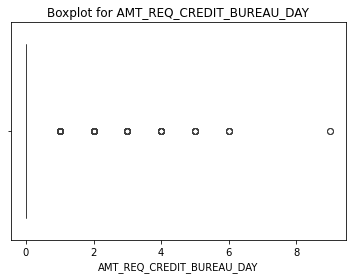

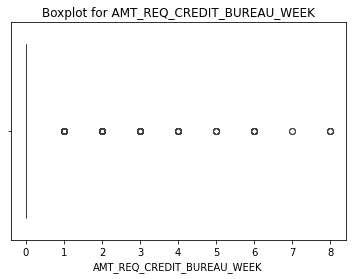

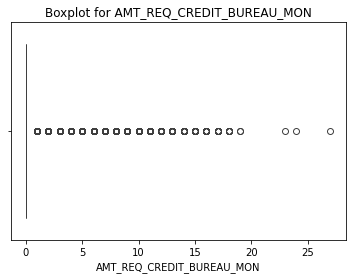

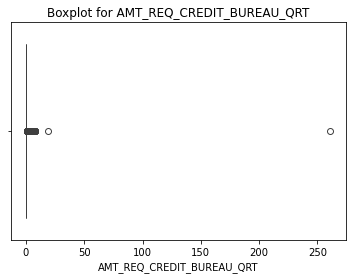

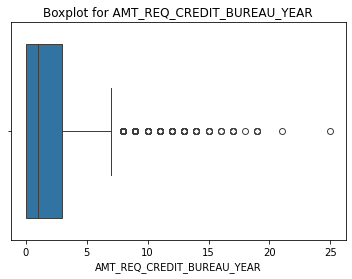

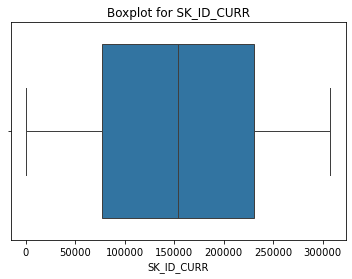

In [29]:
## Check outliters
app_check.split_data()
app_check.show_outliers()

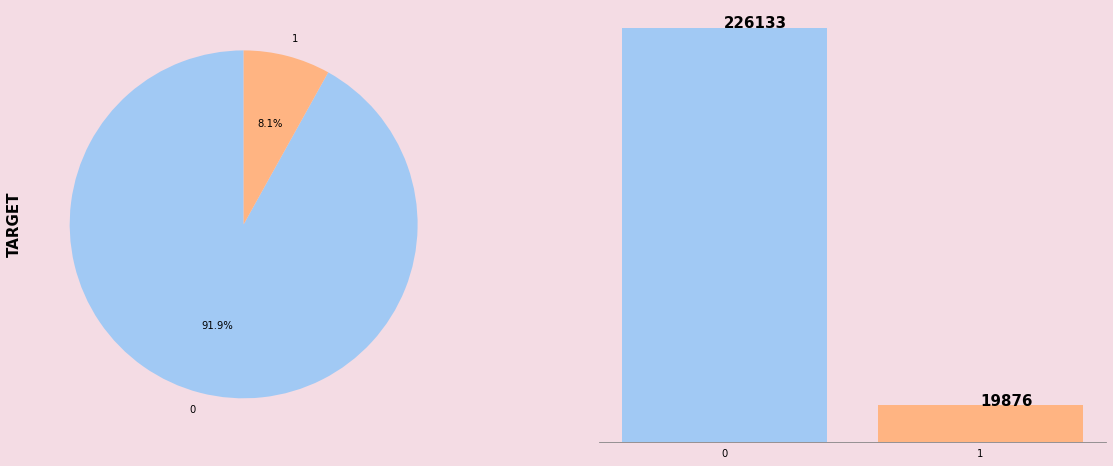

In [30]:
Univariate_Analysis(df = df, col='TARGET',  num=False).visualize()

#### Based on the boxplot for all the numerical data. 
* We see that there are many columns that contain only 2 value (0,1) but the difference between each values is too high. Here are all the table can be seen clearly from the given boxplots

    + The Target value is imbalanced, the value 0 takes a huge part -> that can reduce the accuracy of the model
    + There are a lot of personal information following this trend, like contains phones, or check client's permanent address


In [31]:
# Check valid value

## Num data
app_check.split_data()
app_check.check_value_num()
print('\n\n\n')

## cat data
app_check.check_value_cat()

CNT_CHILDREN  has     >0 73676,  =0 172333  ,   <0 0,    nan: 0,   other values: 0
AMT_INCOME_TOTAL  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_CREDIT  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
AMT_ANNUITY  has     >0 245999,  =0 0  ,   <0 0,    nan: 10,   other values: 0
AMT_GOODS_PRICE  has     >0 245785,  =0 0  ,   <0 0,    nan: 224,   other values: 0
REGION_POPULATION_RELATIVE  has     >0 246009,  =0 0  ,   <0 0,    nan: 0,   other values: 0
DAYS_BIRTH  has     >0 0,  =0 0  ,   <0 246009,    nan: 0,   other values: 0
DAYS_EMPLOYED  has     >0 44324,  =0 2  ,   <0 201683,    nan: 0,   other values: 0
DAYS_REGISTRATION  has     >0 0,  =0 59  ,   <0 245950,    nan: 0,   other values: 0
DAYS_ID_PUBLISH  has     >0 0,  =0 13  ,   <0 245996,    nan: 0,   other values: 0
OWN_CAR_AGE  has     >0 82120,  =0 1701  ,   <0 0,    nan: 162188,   other values: 0
CNT_FAM_MEMBERS  has     >0 246008,  =0 0  ,   <0 0,    nan: 1,   other values: 0
HOUR_

# Data Exploratory

Followed this chart, we can see that:

* Name_housing_type 88.8% loaning clients live in their own house 
* In Name_type_suite, Almost the clients take a loan by themselves -> they are in the middle - age 

## EDA Internal and External


* This data set is all about the information related to clients
* I can divide it into small parts
    + Personal Information (13)
    + Working and Education Information (4) (v)
    + Asset Information (3) (v)
    + Loan Information(3)
    + Contact Information (7) (v)
    + Region Information (9) (v)
    + Housing Information(47) (v)
    + Social Information(4) (v)
    + Ext Source Information(3) (v)
    + Document Information(20) (v)
    + Bureau Information (6) (v)

### Personal Information

In [32]:
pinfo_col = ['NAME_CONTRACT_TYPE','CODE_GENDER', 'CNT_CHILDREN', 'NAME_HOUSING_TYPE',
             'NAME_TYPE_SUITE','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS',  'AMT_INCOME_TOTAL',
            'DAYS_BIRTH', 'DAYS_EMPLOYED','WEEKDAY_APPR_PROCESS_START',
            'HOUR_APPR_PROCESS_START','DAYS_REGISTRATION','DAYS_ID_PUBLISH','TARGET']
pinfo = df[pinfo_col]
pinfo

,NAME_CONTRACT_TYPE,CODE_GENDER,CNT_CHILDREN,NAME_HOUSING_TYPE,NAME_TYPE_SUITE,NAME_FAMILY_STATUS,CNT_FAM_MEMBERS,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,DAYS_REGISTRATION,DAYS_ID_PUBLISH,TARGET
0,Cash loans,F,0,House / apartment,Family,Married,2.0,270000.0,-16765,-1188,MONDAY,11,-1186.0,-291,0
1,Cash loans,F,0,House / apartment,Unaccompanied,Civil marriage,2.0,135000.0,-19005,-3039,WEDNESDAY,17,-9833.0,-2437,0
2,Cash loans,M,0,House / apartment,Unaccompanied,Single / not married,1.0,121500.0,-19932,-3038,THURSDAY,11,-4311.0,-3458,0
3,Cash loans,M,0,House / apartment,"Spouse, partner",Married,2.0,99000.0,-16941,-1588,WEDNESDAY,16,-4970.0,-477,0
4,Cash loans,M,0,House / apartment,Unaccompanied,Married,2.0,360000.0,-18850,-449,MONDAY,16,-4597.0,-2379,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,Cash loans,M,0,With parents,Unaccompanied,Separated,1.0,157500.0,-9327,-236,THURSDAY,15,-8456.0,-1982,0
246005,Cash loans,F,0,House / apartment,Unaccompanied,Widow,1.0,72000.0,-20775,365243,MONDAY,8,-4388.0,-4090,0
246006,Cash loans,F,0,House / apartment,Unaccompanied,Separated,1.0,153000.0,-14966,-7921,THURSDAY,9,-6737.0,-5150,0
246007,Cash loans,F,0,House / apartment,Unaccompanied,Married,2.0,171000.0,-11961,-4786,WEDNESDAY,9,-2562.0,-931,1


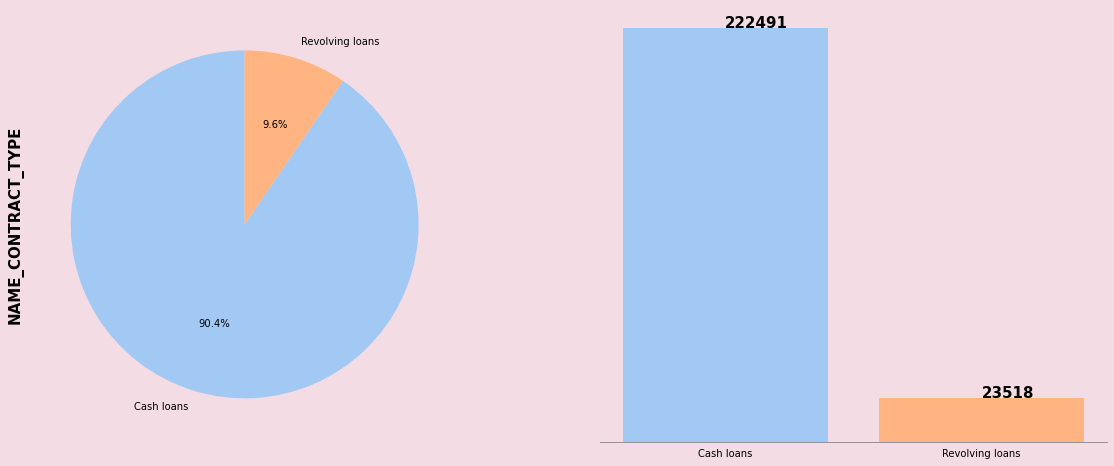

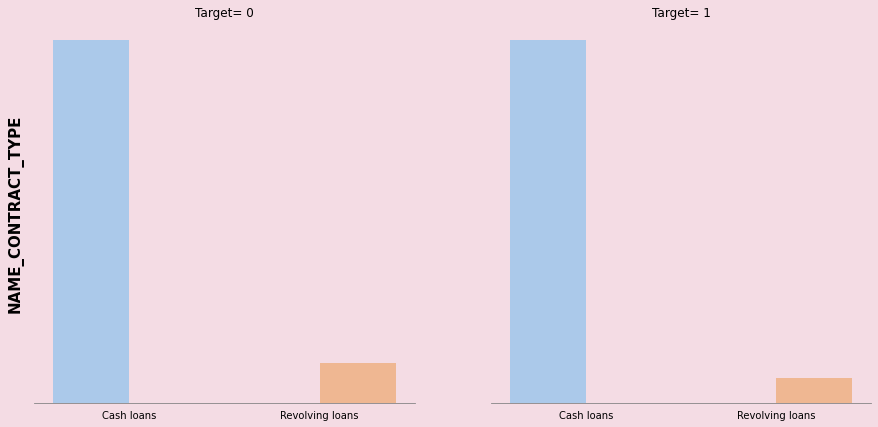

In [33]:
Univariate_Analysis(df = pinfo, col = 'NAME_CONTRACT_TYPE',num= False).visualize()
Bivariate_Analysis(df = pinfo, col1 = 'NAME_CONTRACT_TYPE',num= False).countplot()

* Most of the applications is Cash loan contract type (90.4%)

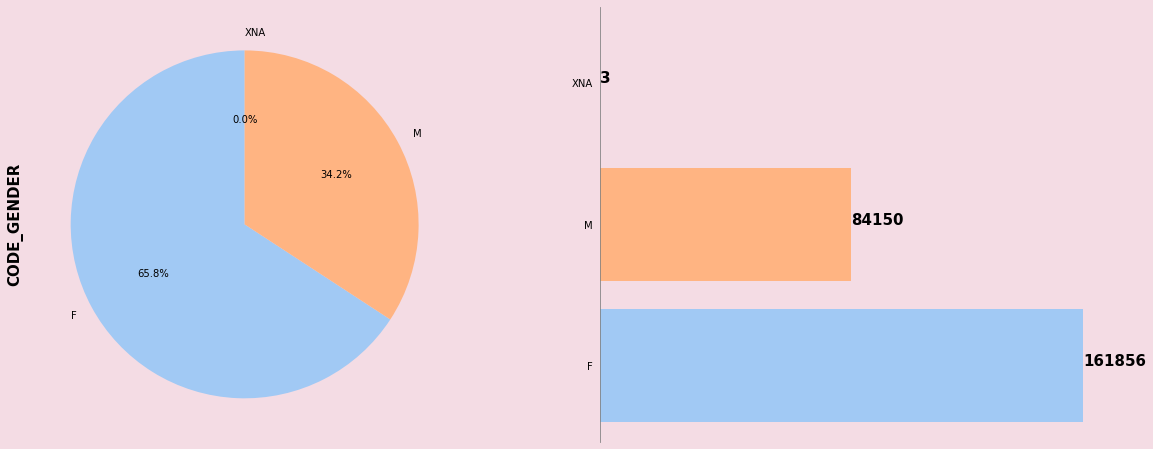

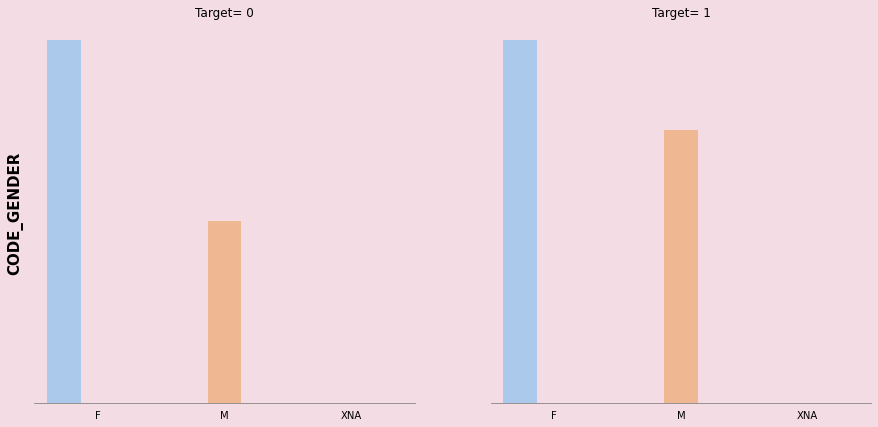

In [34]:
Univariate_Analysis(df = pinfo, col = 'CODE_GENDER',num= False).visualize()
Bivariate_Analysis(df = pinfo, col1 = 'CODE_GENDER',num= False).countplot()

+ Số lượng phụ nữ đi vay nhiều hơn nam giới nhưng có vẻ là nam giới khó trả được nợ hơn con trai

'Your input is not categorical'

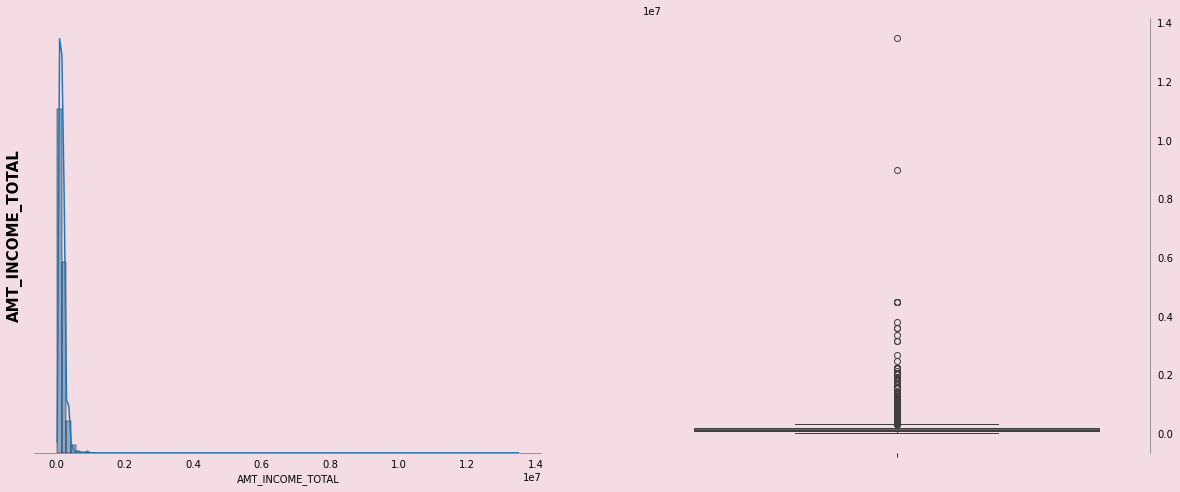

In [35]:
Univariate_Analysis(df = pinfo, col = 'AMT_INCOME_TOTAL',num= True).visualize()
Bivariate_Analysis(df = pinfo, col1 = 'AMT_INCOME_TOTAL',num= True).countplot()

* Về mức thu nhập hàng năm của khách hàng, dường như ta thấy khách hàng có thu nhập trong khoảng từ 0 - 2,000,000 nhưng cũng có những khách hàng khá là sộp như là 1.4 x10^7.

In [36]:
pinfo[pinfo['DAYS_EMPLOYED'] > 0]['DAYS_EMPLOYED']

5         365243
16        365243
27        365243
31        365243
34        365243
           ...  
245972    365243
245985    365243
245988    365243
246003    365243
246005    365243
Name: DAYS_EMPLOYED, Length: 44324, dtype: int64

In [37]:
# Day related to the Clients
pinfo['DAYS_EMPLOYED'] = pinfo['DAYS_EMPLOYED'].replace(365243,np.nan)
ctime_pinfo = pinfo[['DAYS_BIRTH', 'DAYS_EMPLOYED']]
#In the DAYS_BIRTH and DAYS_EMPLOYED are not in the correct form , they should be convert to years    
ctime_pinfo['DAYS_BIRTH'] = ctime_pinfo['DAYS_BIRTH'].apply(lambda x: int((x * -1) / 365))
ctime_pinfo = ctime_pinfo.rename({'DAYS_BIRTH': 'AGE'}, axis=1)
ctime_pinfo['TARGET'] = pinfo['TARGET']
ctime_pinfo

,AGE,DAYS_EMPLOYED,TARGET
0,45,-1188.0,0
1,52,-3039.0,0
2,54,-3038.0,0
3,46,-1588.0,0
4,51,-449.0,0
...,...,...,...
246004,25,-236.0,0
246005,56,NaN,0
246006,41,-7921.0,0
246007,32,-4786.0,1


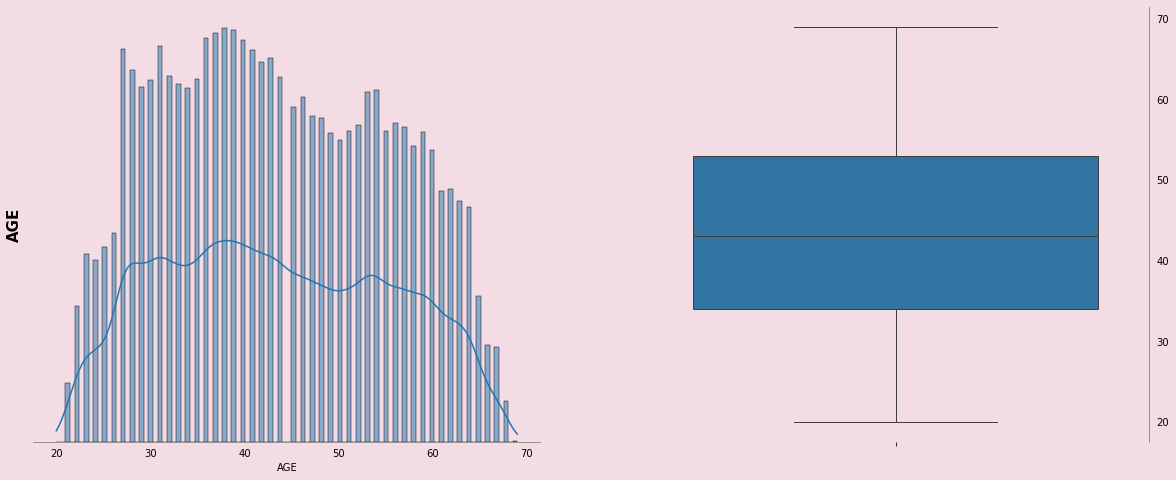

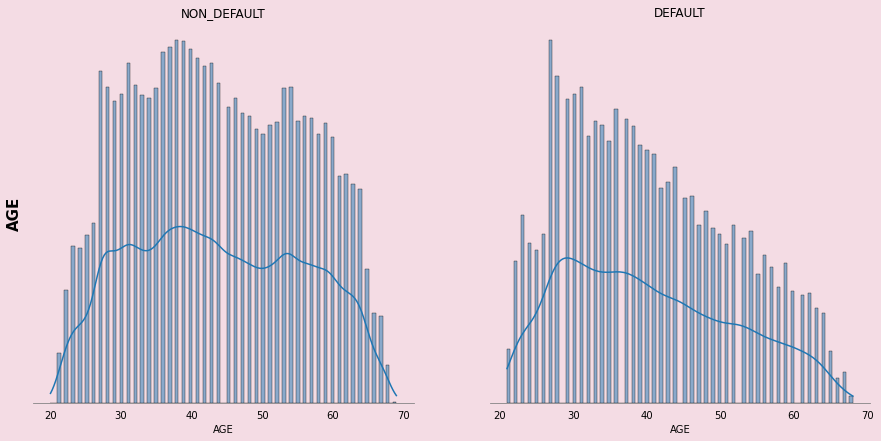

In [38]:
Univariate_Analysis(df = ctime_pinfo, col = 'AGE',num= True).visualize()
Bivariate_Analysis(df = ctime_pinfo, col1 = 'AGE',num= True).plothistogram()

+ We can see most of clients are in the middle-age (from 35 to 50)
+ Looking the AGE, we can see the significant differences in 2 value of Target columns.
    - The Non-Default Clients ( Target = 0) are usually at the age from 30 to nearly 70 -> It means the Non-default clients are in the middle- aged or having a qualified life. But, the Default Clients(Target = 1) is significant at younger generation from maybe 28 and reduce dramatically if the clients are older.


In [39]:
# Family Information
faminfo = pinfo[['CNT_CHILDREN','NAME_FAMILY_STATUS','CNT_FAM_MEMBERS','TARGET']]

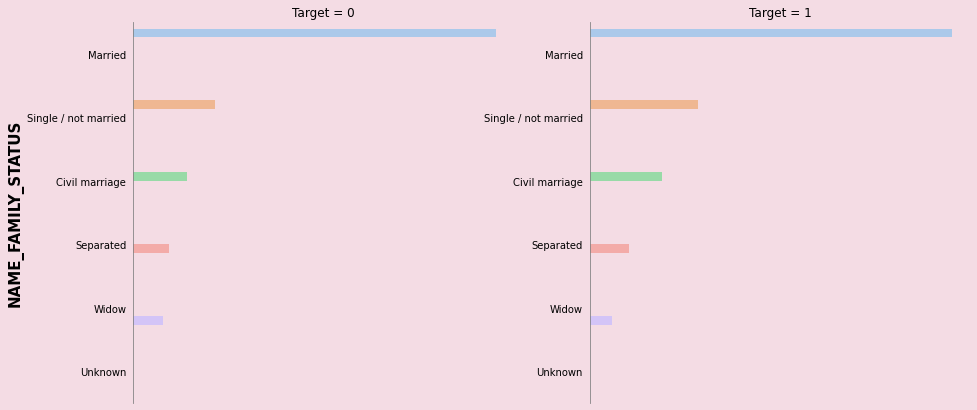

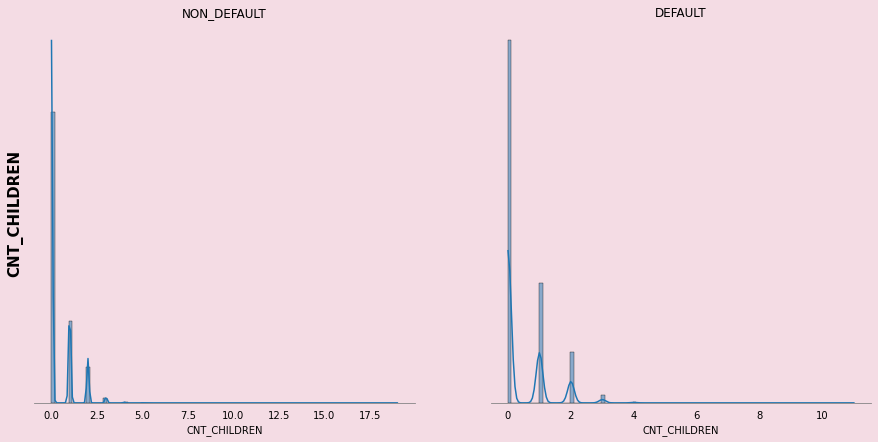

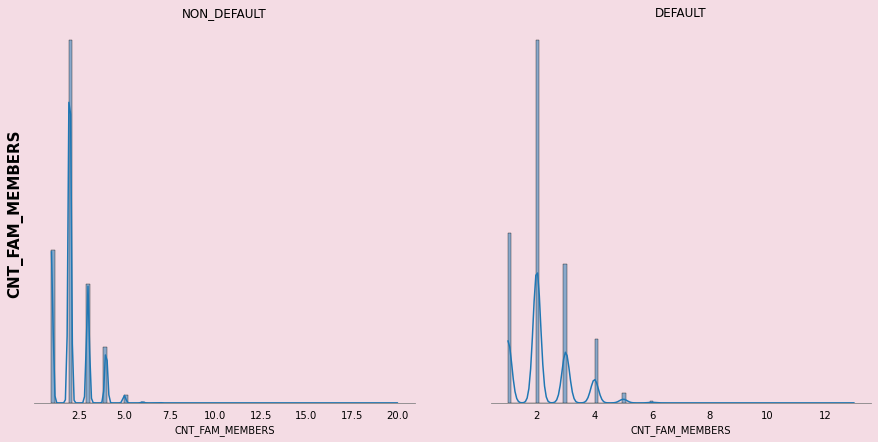

In [40]:
Bivariate_Analysis(df= faminfo, col1 = 'NAME_FAMILY_STATUS', num= False).countplot()
Bivariate_Analysis(df= faminfo, col1 = 'CNT_CHILDREN', num= True).plothistogram()
Bivariate_Analysis(df= faminfo, col1 = 'CNT_FAM_MEMBERS', num= True).plothistogram()

* Most of clients are married, followed by Single/not married and civil marriage
* Most of the clients taking a loan have no children. The number of loans associated with the clients with one children are 4 times smaller, the number of loans associated with the clients with two children are 8 times smaller; clients with 3, 4 or more children are much more rare.
* Clients with family members of 2 are most numerous, followed by 1 (single persons), 3 (families with one child) and 4.

### Working and Education Information

In [41]:
weinfo_col = ['OCCUPATION_TYPE','ORGANIZATION_TYPE','NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE','TARGET']
weinfo = df[weinfo_col]
weinfo

,OCCUPATION_TYPE,ORGANIZATION_TYPE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,TARGET
0,Core staff,School,State servant,Higher education,0
1,Laborers,Business Entity Type 3,Working,Secondary / secondary special,0
2,Core staff,Religion,Working,Secondary / secondary special,0
3,Laborers,Other,State servant,Secondary / secondary special,0
4,Managers,Other,State servant,Higher education,0
...,...,...,...,...,...
246004,Sales staff,Services,Working,Secondary / secondary special,0
246005,NaN,XNA,Pensioner,Secondary / secondary special,0
246006,Managers,School,Working,Higher education,0
246007,Laborers,Business Entity Type 1,Commercial associate,Secondary / secondary special,1


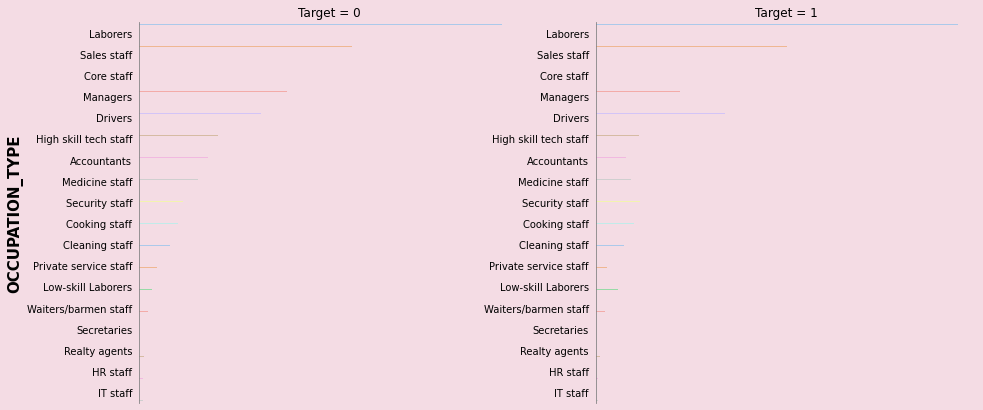

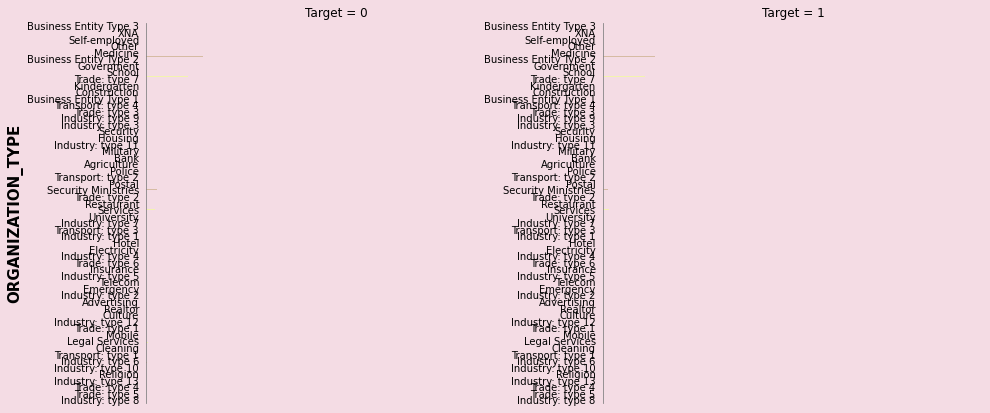

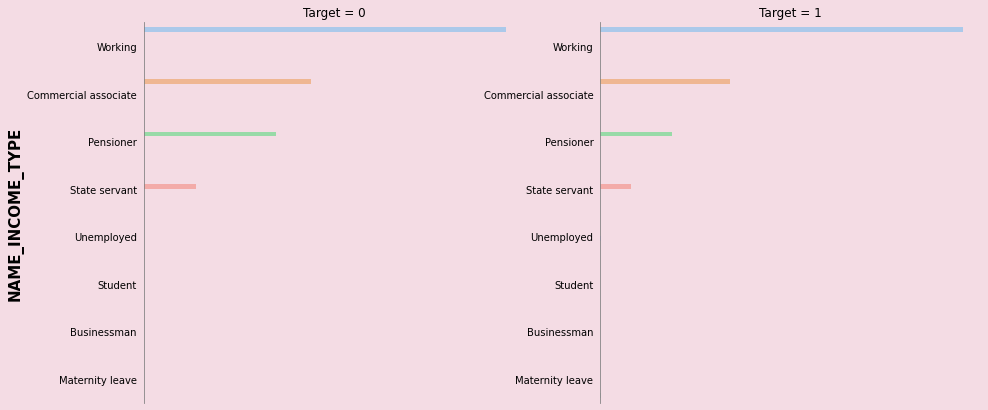

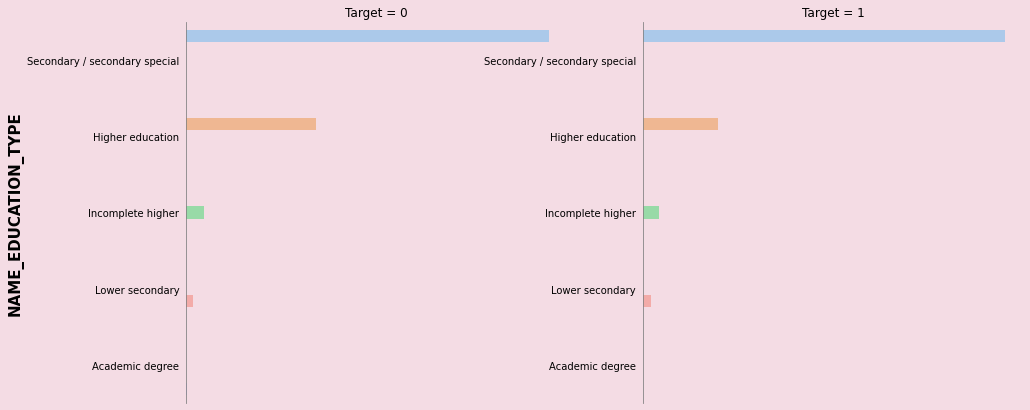

In [42]:
for col in weinfo_col[:-1]:
    Bivariate_Analysis(df = weinfo, col1 = col,num= False).countplot()

* The 3 largest percents of occupation that make and pay the loan on time is laborers, core staff and sale staff, while IT staff take the lowest place

* Most of applicants for loans are income from Working, followed by Commercial associate, Pensioner and State servant.

* The education of most of applicants for loans are higher than secondary -> It means that the customer's education level is quite qualified.

* 4 features here represent well in distribution in Target value. 

### Asset information

In [43]:
ainfo_col = ['FLAG_OWN_CAR','FLAG_OWN_REALTY', 'OWN_CAR_AGE','TARGET']
ainfo = df[ainfo_col]
ainfo

,FLAG_OWN_CAR,FLAG_OWN_REALTY,OWN_CAR_AGE,TARGET
0,N,N,NaN,0
1,N,Y,NaN,0
2,N,Y,NaN,0
3,N,Y,NaN,0
4,Y,Y,8.0,0
...,...,...,...,...
246004,N,N,NaN,0
246005,N,Y,NaN,0
246006,N,Y,NaN,0
246007,N,Y,NaN,1


In [44]:
def check_asset(df):
    if df['FLAG_OWN_CAR'] == 'Y' and df['FLAG_OWN_REALTY']== 'Y':
          return 1
    else:
         return 0
ainfo['Flag_Having_both_car_and_reality'] = ainfo.apply(check_asset,axis= 1)

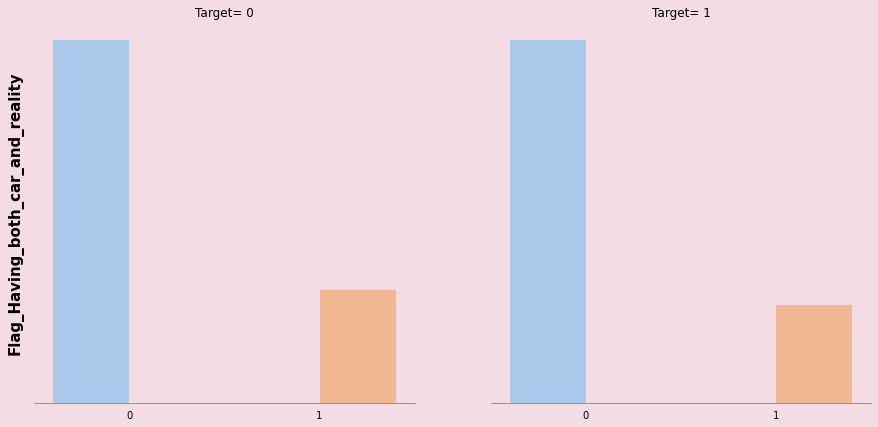

In [45]:
Bivariate_Analysis(df = ainfo, col1= 'Flag_Having_both_car_and_reality',num= False).countplot()

## Loan Information

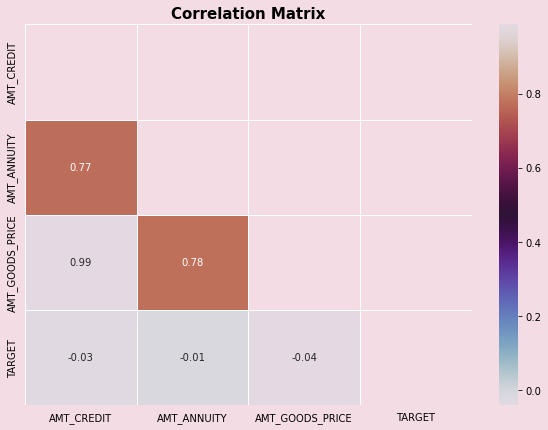

In [46]:
linfo = df[['AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','TARGET']]
draw_corr(linfo)

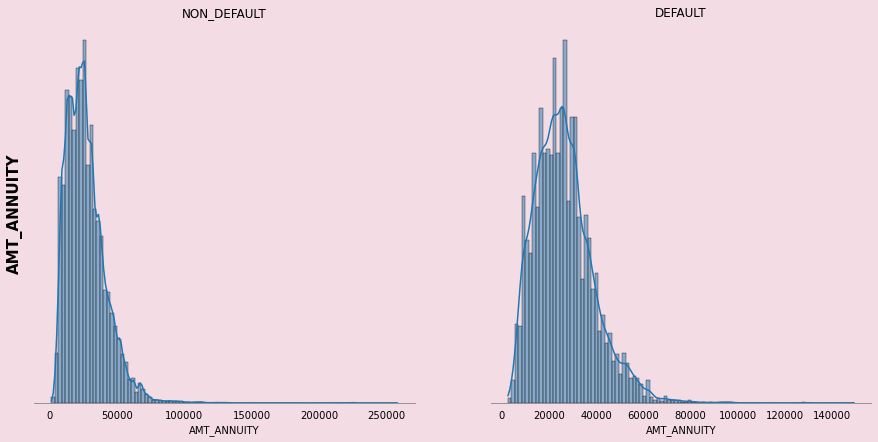

In [47]:
Bivariate_Analysis(df = linfo, col1 = 'AMT_ANNUITY',num=True).plothistogram()

* From here I can see that Client in both 2 types: Default and Non-default are likely to accepted to take a loan with medium money yearly paid from 20000 to 50000. 

### Contact Information

In [48]:
cinfo_col = ['FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL','DAYS_LAST_PHONE_CHANGE','TARGET']
cinfo = df[cinfo_col]
cinfo

,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,DAYS_LAST_PHONE_CHANGE,TARGET
0,1,1,0,1,1,0,-828.0,0
1,1,1,0,1,0,0,-617.0,0
2,1,1,0,1,0,0,-1106.0,0
3,1,1,1,1,1,0,-2536.0,0
4,1,1,1,1,0,0,-1070.0,0
...,...,...,...,...,...,...,...,...
246004,1,1,0,1,0,0,-273.0,0
246005,1,0,0,1,1,0,0.0,0
246006,1,1,0,1,0,1,-1909.0,0
246007,1,1,0,1,0,0,-322.0,1


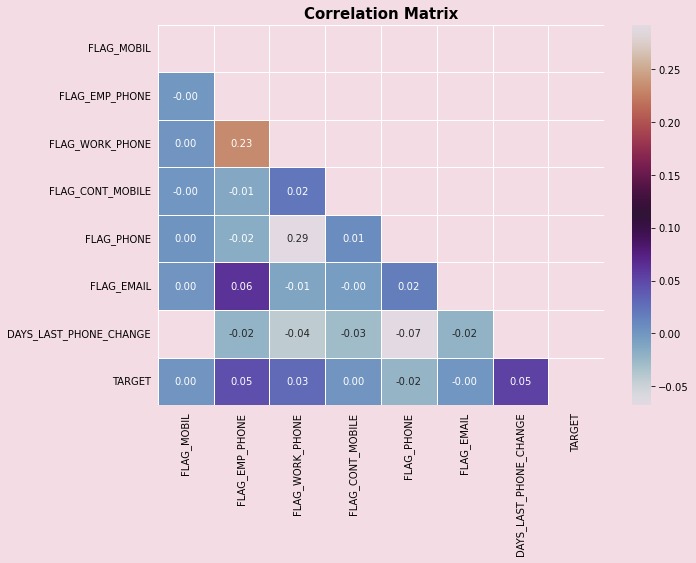

In [49]:
#First I want to EDA the Categorical cols
draw_corr(cinfo)

* WE can see that these features have low corr with target but have low corr with each other

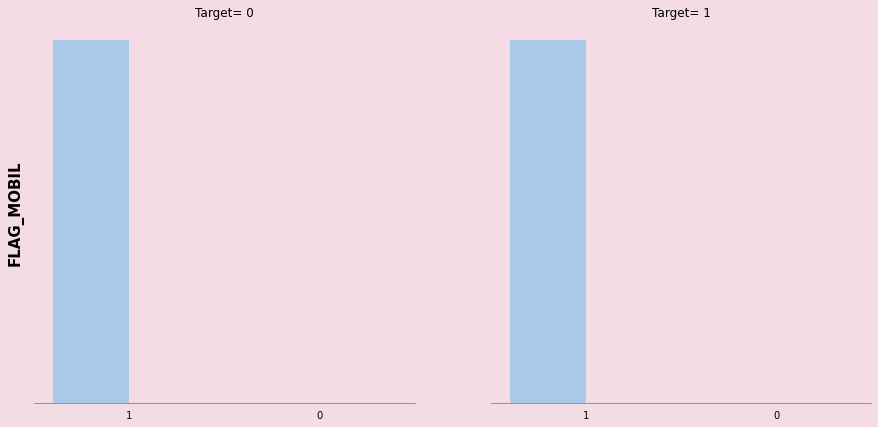

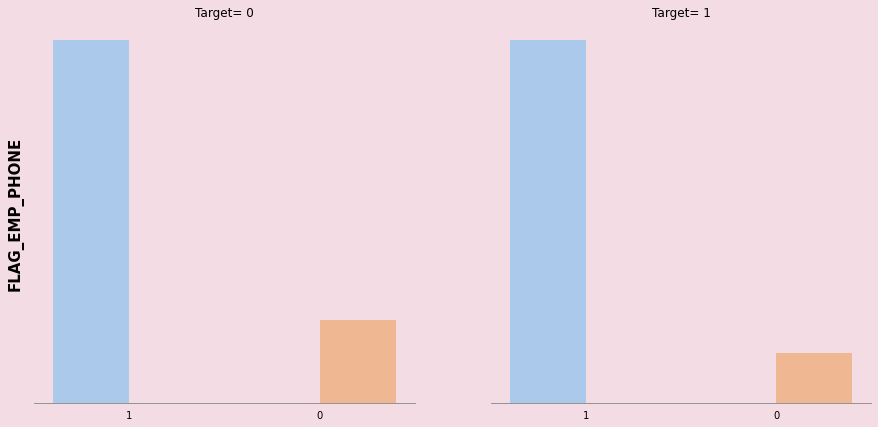

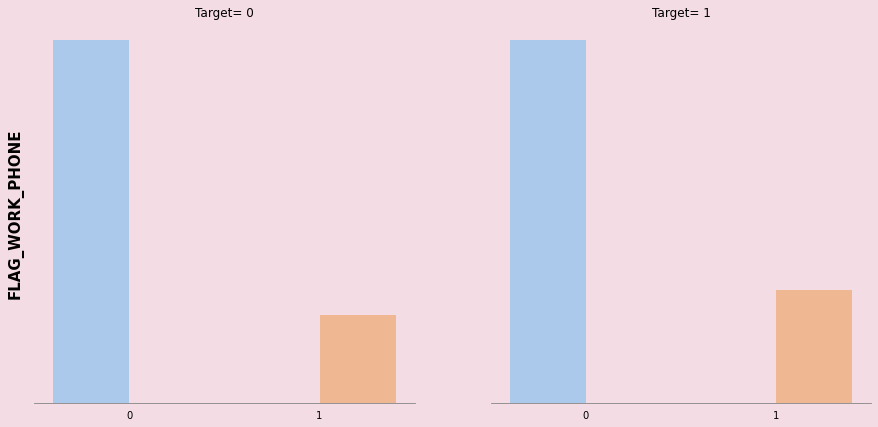

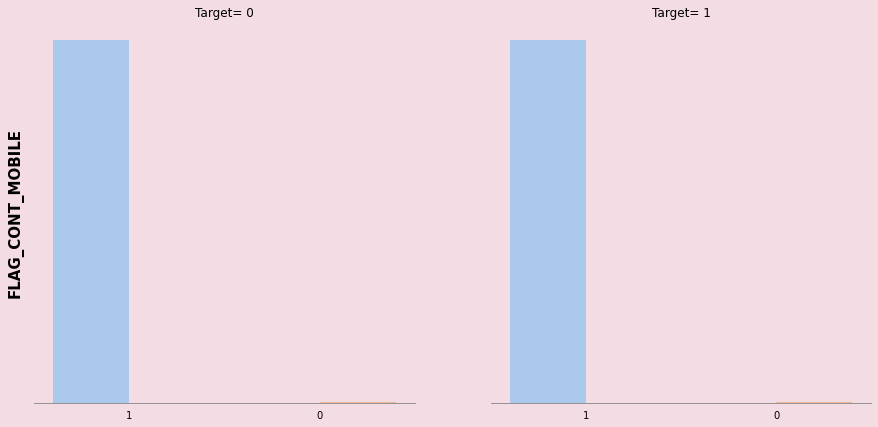

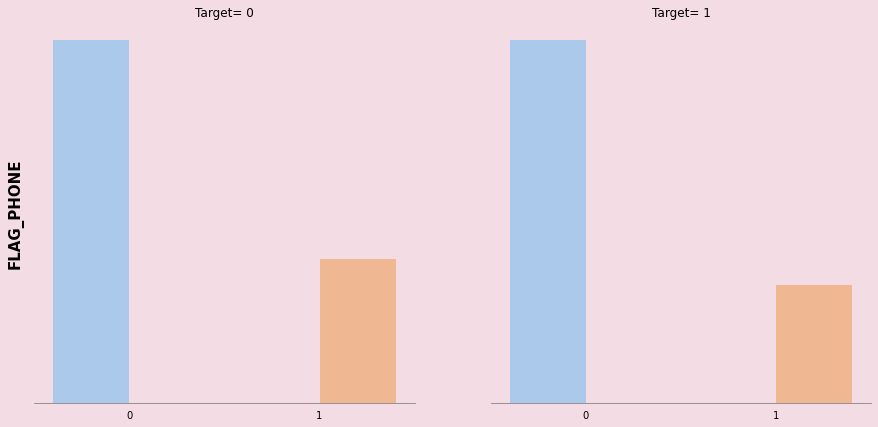

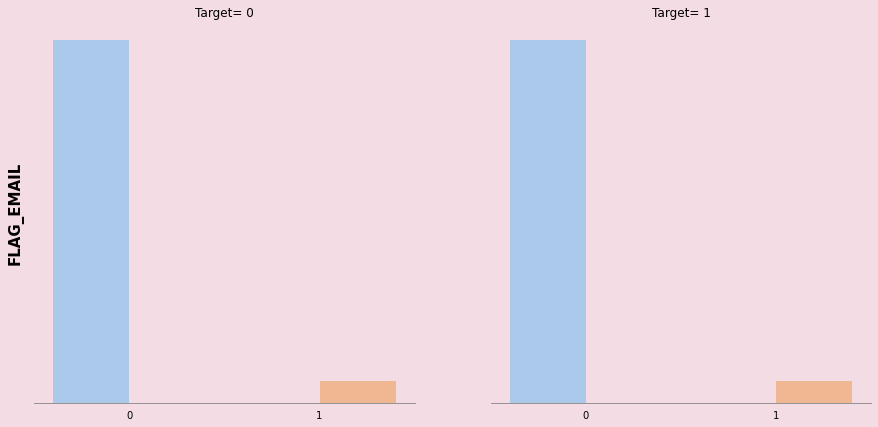

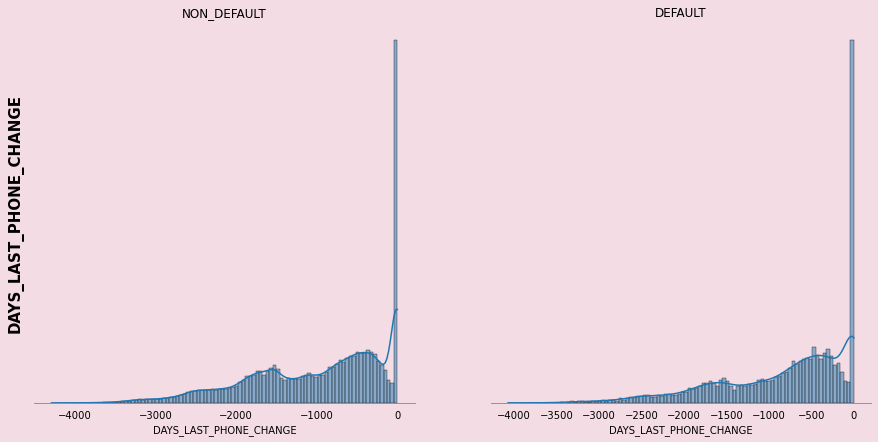

In [50]:
for col in cinfo.columns[:-1]:
    if cinfo[col].nunique() < 3:
        Bivariate_Analysis(df = cinfo, col1 = col,num=False).countplot()
    else:
        Bivariate_Analysis(df = cinfo, col1 = col,num=True).plothistogram()

* These pie charts represent the distribution of the value with each value of a Target Features(0 and 1). But we can see here is that 
    + The differences between each categories is highly different 
    +  Charts of each features are almost the same 

* All clients have their own mobile phone and Most people have their private email 

### Region Information (v)

In [51]:
rinfo_col = ['REGION_RATING_CLIENT','REGION_RATING_CLIENT_W_CITY','REG_REGION_NOT_LIVE_REGION',
            'REG_REGION_NOT_WORK_REGION','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY',
            'REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','TARGET']
rinfo = df[rinfo_col]
rinfo

,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,TARGET
0,1,1,0,0,0,0,0,0,0
1,2,2,0,0,0,0,0,0,0
2,2,2,0,0,0,0,1,1,0
3,2,2,0,0,0,0,0,0,0
4,3,3,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
246004,1,1,0,0,0,0,0,0,0
246005,2,2,0,0,0,0,0,0,0
246006,3,3,0,0,0,0,1,1,0
246007,2,2,0,0,0,1,1,0,1


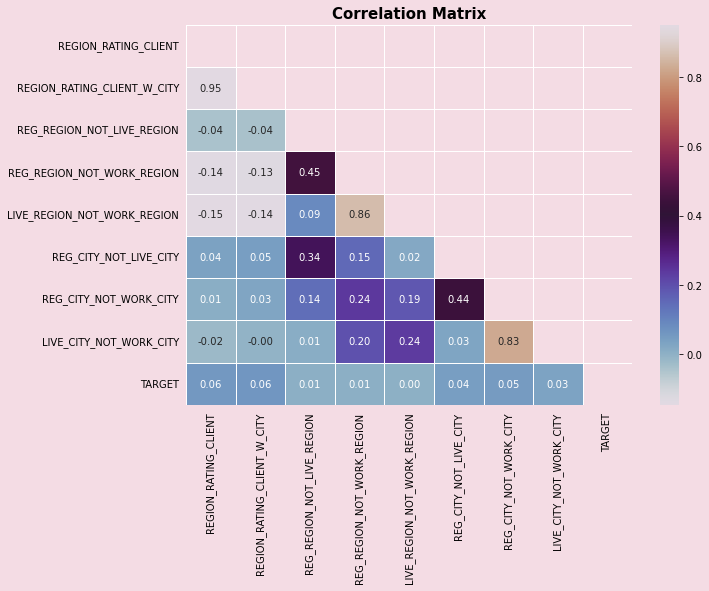

In [52]:
draw_corr(rinfo)

+ 'REGION_RATING_CLIENT' and 'REGION_RATING_CLIENT_W_CITY' are the same (corr = 1) 
+ 'LIVE_REGION_NOT_WORK_REGION' and 'REG_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_WORK_CITY' and 'LIVE_CITY_NOT_WORK_CITY', both couples have extremly high correlation with each other,0.9 and 0.8 respectively 
+ The correlation of all this features is very low with the Target (0.00 -> 0.10)


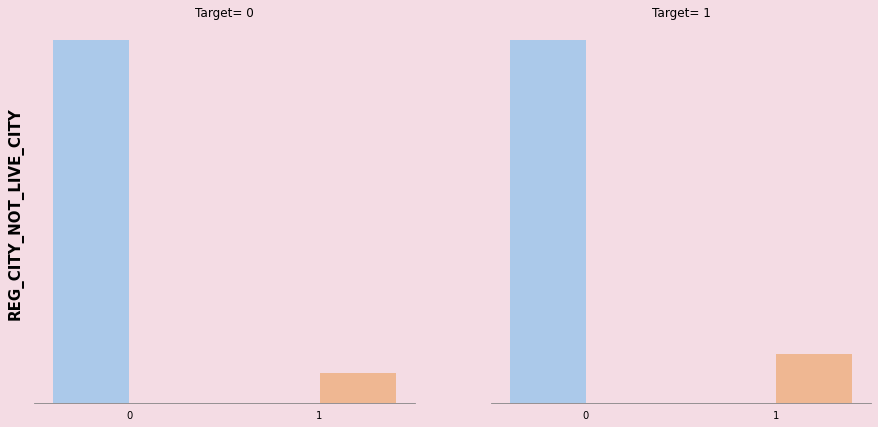

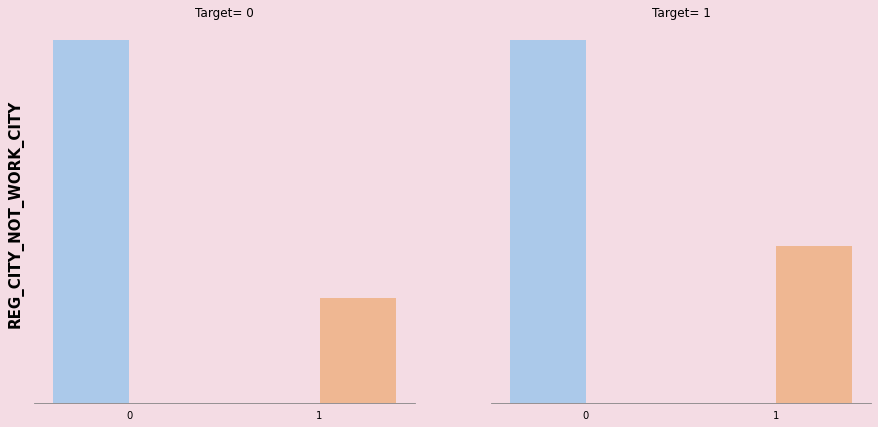

In [53]:
Bivariate_Analysis(df = rinfo, col1 = 'REG_CITY_NOT_LIVE_CITY', num= False).countplot()
Bivariate_Analysis(df = rinfo, col1 = 'REG_CITY_NOT_WORK_CITY', num= False).countplot()

* Much more people register in the city they live or work (a larger number register differently in the working city than living city).

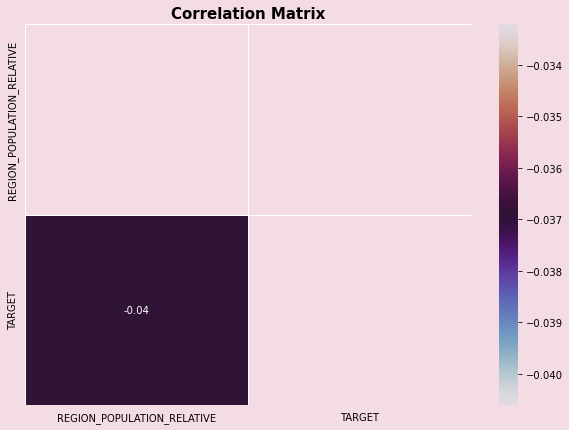

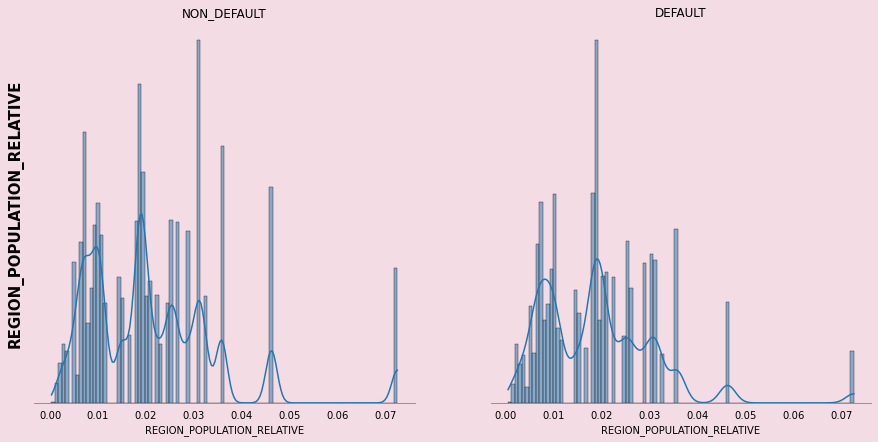

In [54]:
# also there is one feature representing the region information, this is numerical col so i put it here
rinfo_1 = df[['REGION_POPULATION_RELATIVE', 'TARGET']]
draw_corr(rinfo_1)
Bivariate_Analysis(df= rinfo_1, col1= 'REGION_POPULATION_RELATIVE',num= True).plothistogram()

* This feature also have low corr with target and it does not show well enough about the Target distribution

### Housing Information

In [55]:
start = df.columns.get_loc('APARTMENTS_AVG')
end = df.columns.get_loc('EMERGENCYSTATE_MODE')
hinfo_col = list(df.columns[start:end+1])
hinfo_col.append('TARGET')
hinfo = df[hinfo_col]
hinfo

,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,TARGET
0,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,...,0.0787,0.0558,0.0039,0.0100,reg oper account,block of flats,0.0714,Block,No,0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,0.2021,0.0887,0.9876,0.8300,0.0202,0.22,0.1034,0.6042,0.2708,0.0594,...,0.1509,0.2001,0.0757,0.1118,reg oper account,block of flats,0.2898,"Stone, brick",No,0
246005,0.0247,0.0435,0.9727,0.6260,0.0022,0.00,0.1034,0.0833,0.1250,0.0579,...,0.0205,0.0261,0.0000,0.0000,reg oper account,block of flats,0.0214,"Stone, brick",No,0
246006,0.1031,0.0862,0.9816,0.7484,0.0123,0.00,0.2069,0.1667,0.2083,NaN,...,0.0855,0.9445,0.0000,0.0000,reg oper account,block of flats,0.7970,Panel,No,0
246007,0.0124,NaN,0.9771,NaN,NaN,NaN,0.0690,0.0417,NaN,NaN,...,NaN,0.0062,NaN,NaN,NaN,block of flats,0.0086,"Stone, brick",No,1


Before deep analyze, we can see from here there are so many null values in each features, let's have a particular sight

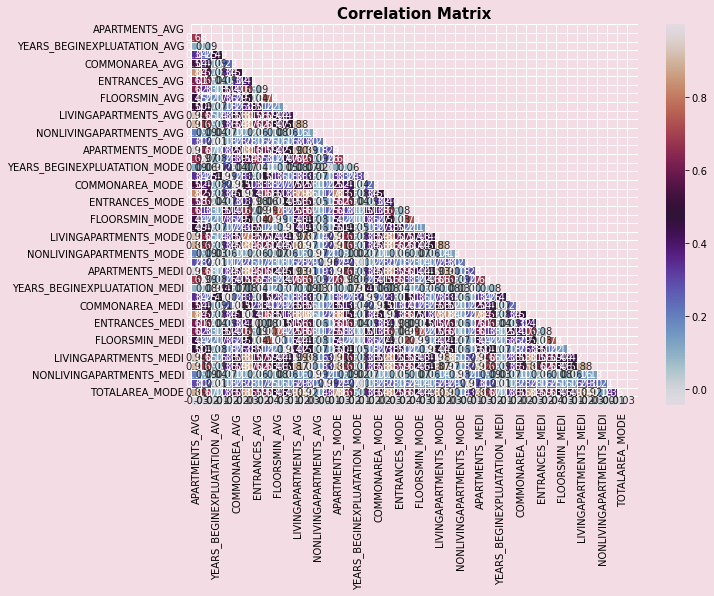

In [56]:
draw_corr(hinfo)

In [57]:
missing_value_df = hinfo.isnull().sum() * 100 / len(hinfo)
missing_value_df


APARTMENTS_AVG                  50.804645
BASEMENTAREA_AVG                58.540948
YEARS_BEGINEXPLUATATION_AVG     48.812035
YEARS_BUILD_AVG                 66.535777
COMMONAREA_AVG                  69.887687
ELEVATORS_AVG                   53.335041
ENTRANCES_AVG                   50.383929
FLOORSMAX_AVG                   49.808340
FLOORSMIN_AVG                   67.865403
LANDAREA_AVG                    59.400266
LIVINGAPARTMENTS_AVG            68.370263
LIVINGAREA_AVG                  50.237186
NONLIVINGAPARTMENTS_AVG         69.456402
NONLIVINGAREA_AVG               55.259767
APARTMENTS_MODE                 50.804645
BASEMENTAREA_MODE               58.540948
YEARS_BEGINEXPLUATATION_MODE    48.812035
YEARS_BUILD_MODE                66.535777
COMMONAREA_MODE                 69.887687
ELEVATORS_MODE                  53.335041
ENTRANCES_MODE                  50.383929
FLOORSMAX_MODE                  49.808340
FLOORSMIN_MODE                  67.865403
LANDAREA_MODE                   59

* Through the corr plot, I can see that:
    + All of the features is really low corr with target value 
    + And each features has a such relatively high corr with each other 

* Through the given Missing values percent Series
    + All of the features have higher than 48% missing values in each ones 

-> From this proof, We can remove all this features

### Conclusion : Remove all Housing Information

#### Social Information

In [58]:
sinfo_col = ['TARGET','OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
sinfo = df[sinfo_col]
sinfo

,TARGET,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE
0,0,1.0,0.0,1.0,0.0
1,0,2.0,0.0,2.0,0.0
2,0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0
4,0,2.0,0.0,2.0,0.0
...,...,...,...,...,...
246004,0,0.0,0.0,0.0,0.0
246005,0,0.0,0.0,0.0,0.0
246006,0,6.0,0.0,6.0,0.0
246007,1,0.0,0.0,0.0,0.0


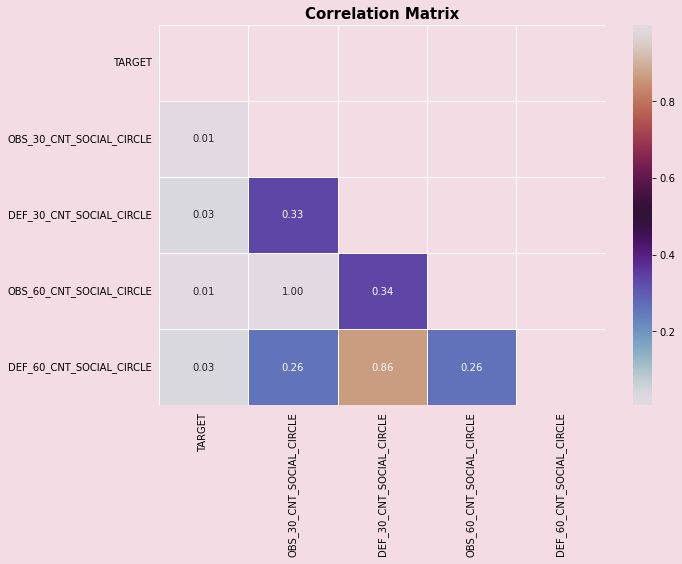

In [59]:
draw_corr(sinfo)

* cột OBS_30_CNT_SOCIAL_CIRCLE và OBS_60_CNT_SOCIAL_CIRCLE giống hệt nhau ( corr = 1)

* DEF_30_CNT_SOCIAL_CIRCLE và DEF_60_CNT_SOCIAL_CIRCLE có hệ số tương quan khá cao,0.86

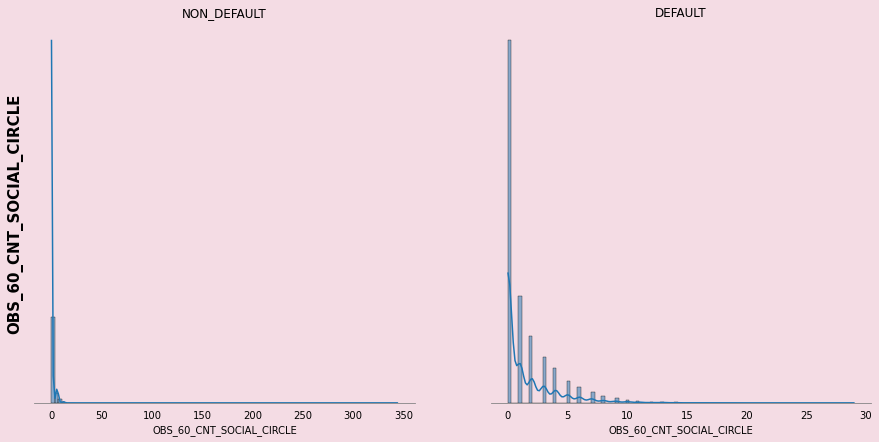

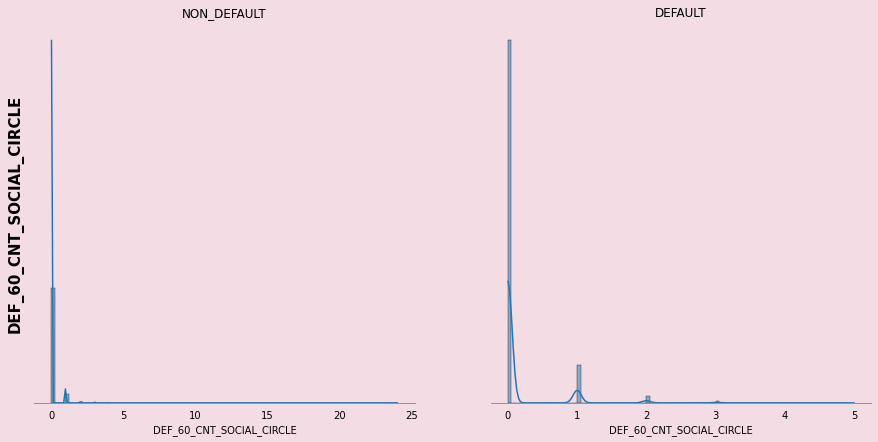

In [60]:
for col in ['OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']:
    Bivariate_Analysis(df = sinfo, col1= col, num= True).plothistogram()


* This feature seems that not having any impact on Target value because 2 histogram plot had the same trends

#### Ext Source Information

In [61]:
extsourceinfo_col = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','TARGET']
extsourceinfo = df[extsourceinfo_col]
extsourceinfo

,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,TARGET
0,0.311267,0.622246,NaN,0
1,NaN,0.650442,NaN,0
2,NaN,0.322738,NaN,0
3,NaN,0.354225,0.621226,0
4,NaN,0.714279,0.540654,0
...,...,...,...,...
246004,0.145570,0.681632,NaN,0
246005,NaN,0.115992,NaN,0
246006,0.744026,0.535722,0.218859,0
246007,NaN,0.514163,0.661024,1


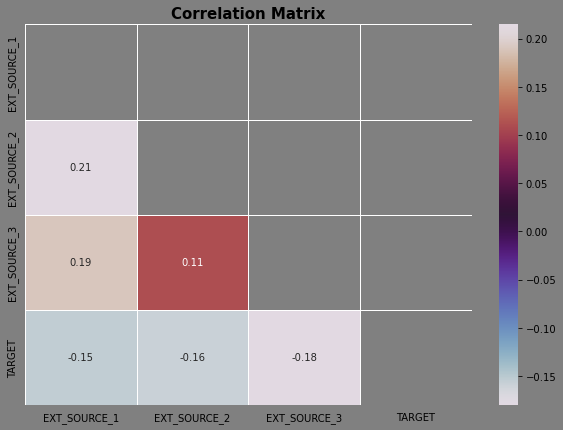

In [62]:
correlation_matrix = extsourceinfo.corr()
fig,ax = plt.subplots(figsize=(10, 7))
fig.set_facecolor('grey')
ax.set_facecolor('grey')
sns.heatmap(correlation_matrix, annot=True, cmap='twilight', fmt='.2f', 
            mask = np.triu(np.ones_like(correlation_matrix,dtype=bool))
            ,linewidths=0.5,ax= ax)
ax.set_title('Correlation Matrix', weight= 'bold', size = 15)
ax.tick_params(left = False,  bottom = False)


* tất cả các features này đều có corr âm với lại biến target, có nghĩa là biến này càng tăng thì biến target sẽ giảm, hay là khả năng trả được nợ sẽ cao hơn ( target càng giảm về 0)


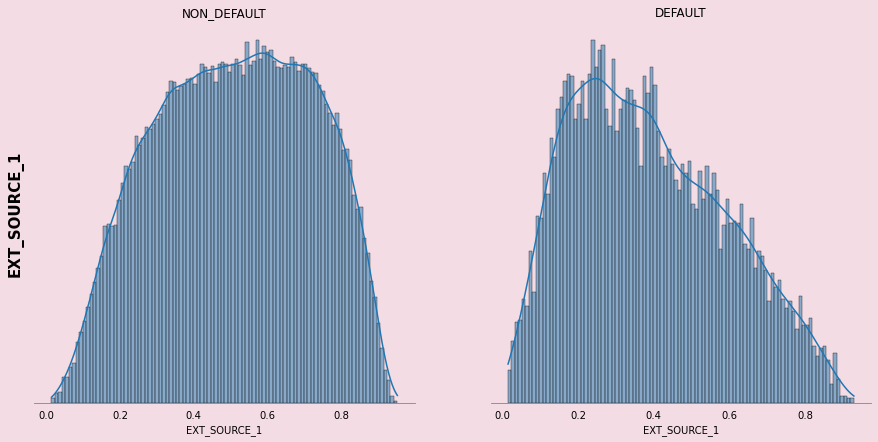

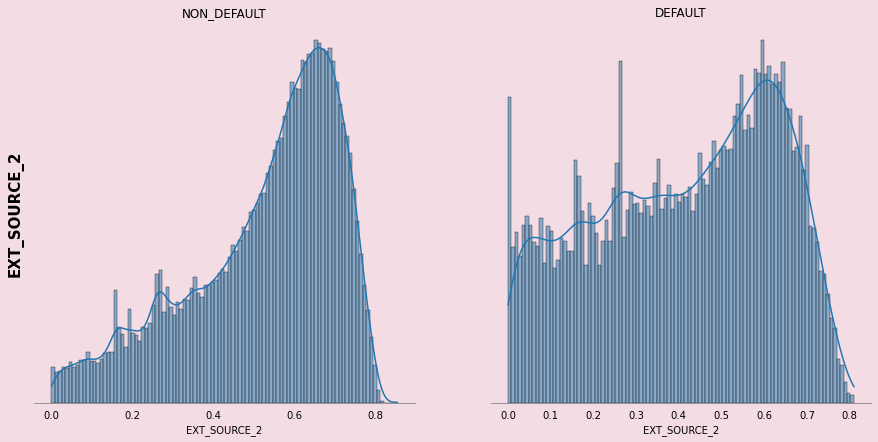

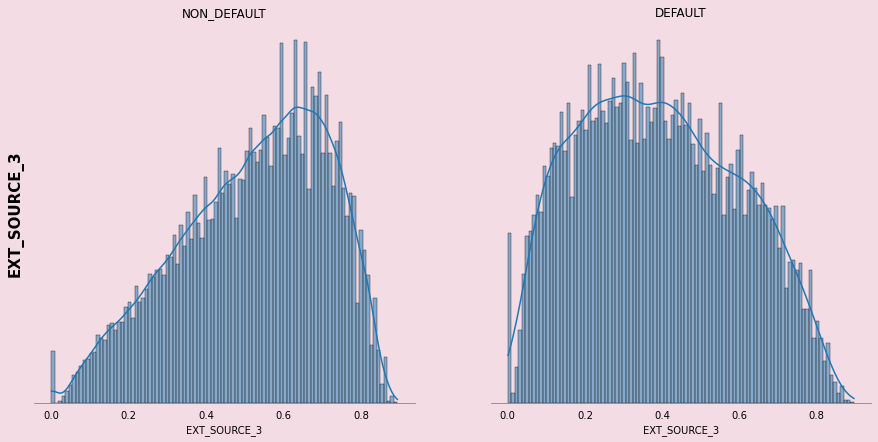

In [63]:
# distribution of each features
for col in extsourceinfo.columns[:-1]:
    Bivariate_Analysis(df= extsourceinfo, col1= col, num=True).plothistogram()

In [64]:
extsourceinfo.isnull().sum() / extsourceinfo.shape[0] * 100

EXT_SOURCE_1    56.308916
EXT_SOURCE_2     0.215033
EXT_SOURCE_3    19.846428
TARGET           0.000000
dtype: float64


-> 2 featues 'EXT_SOURCE_1' và 'EXT_SOURCE_3' đống vai trò quan trọng trong model, do có sự phân hóa rõ rệt giữa các giá trị cho target value


-> Tuy nhiên có vấn đề là ở ext_source_1 có hơn 56% là giá trị null nên cần phải xem xét xem nên fillna như thế nào thì sẽ hợp lí 

### Document Information

In [65]:
start = df.columns.get_loc('FLAG_DOCUMENT_2')
end = df.columns.get_loc('FLAG_DOCUMENT_21')
dinfo_col = list(df.columns[start:end+1])
dinfo_col.append('TARGET')
dinfo = df[dinfo_col]
dinfo

,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,...,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,TARGET
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246004,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246005,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246006,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
246007,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


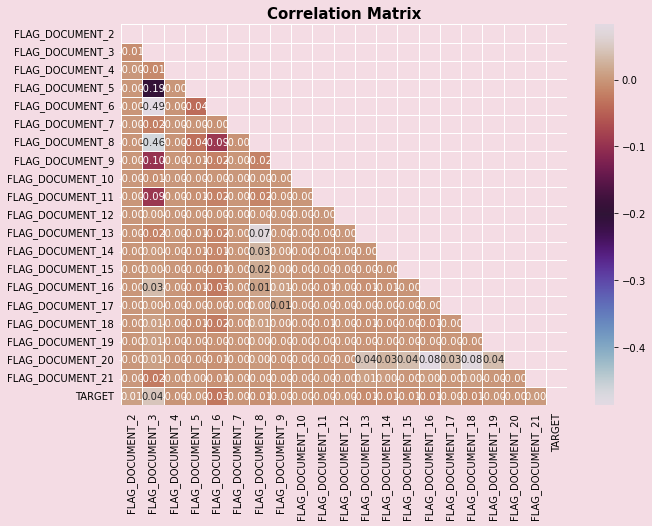

In [66]:
## Check corr,
draw_corr(dinfo)

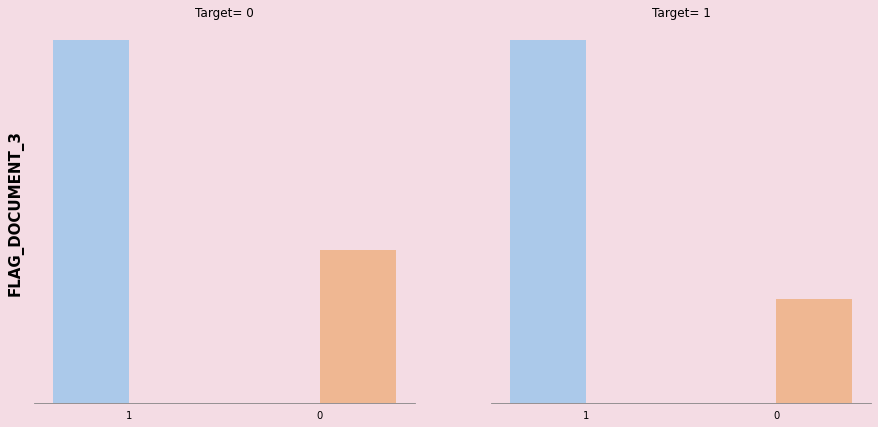

In [67]:
Bivariate_Analysis(df = dinfo, col1 = 'FLAG_DOCUMENT_3',num=False).countplot()

* Distribution của cả 2 target đều gần như y hệt nhau


### Bureau Information

In [68]:
binfo_col = [
'TARGET',
'AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR'
]
binfo = df[binfo_col]
binfo


,TARGET,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,0,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,1.0,1.0
4,0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...
246004,0,NaN,NaN,NaN,NaN,NaN,NaN
246005,0,NaN,NaN,NaN,NaN,NaN,NaN
246006,0,1.0,0.0,0.0,1.0,0.0,1.0
246007,1,0.0,0.0,0.0,0.0,0.0,0.0


* This infomation is all about the enquires of the Clients to Bureau in separting time 

--> To make easier, we can convert all of column in this df into day and summary all.

--> After that we need to check if this column is needed( corr with target)


In [69]:
## Add one column convert the value into day and sum all
binfo['AMT_REQ_CREDIT_BUREAU_TOTAL_DAY'] = (
    binfo['AMT_REQ_CREDIT_BUREAU_HOUR'] / 24 +
    binfo['AMT_REQ_CREDIT_BUREAU_DAY'] +
    binfo['AMT_REQ_CREDIT_BUREAU_MON'] * 30 +
    binfo['AMT_REQ_CREDIT_BUREAU_YEAR'] * 365 +
    binfo['AMT_REQ_CREDIT_BUREAU_WEEK'] * 7 +
    binfo['AMT_REQ_CREDIT_BUREAU_QRT'] * 3 * 30
)
## And so, there are only 2 useful features in this df is Target and the new col
binfo

,TARGET,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_REQ_CREDIT_BUREAU_TOTAL_DAY
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,0,0.0,0.0,0.0,0.0,1.0,1.0,455.000000
4,0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
...,...,...,...,...,...,...,...,...
246004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
246006,0,1.0,0.0,0.0,1.0,0.0,1.0,395.041667
246007,1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000


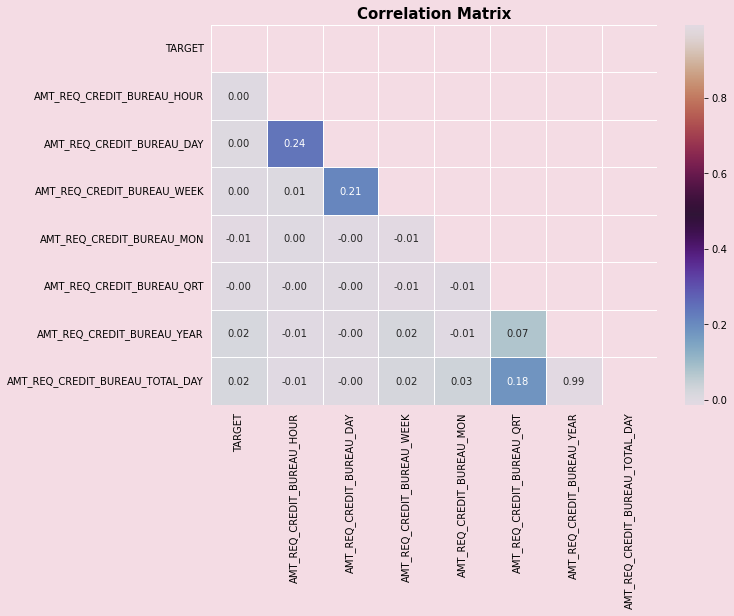

In [70]:
## Check corr,
draw_corr(binfo)

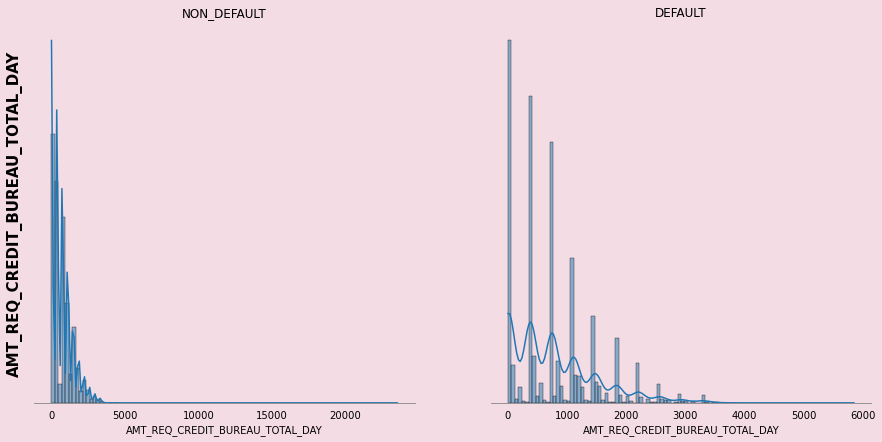

In [71]:
Bivariate_Analysis(df= binfo, col1 = 'AMT_REQ_CREDIT_BUREAU_TOTAL_DAY').plothistogram()

* Mặc dù có tỉ lệ tương quan tương đối thấp (0.02) nhưng features này nó có sự phân chia rõ ràng giữa các biến target. Hầu hêt các khách hàng được xếp vào target = 1(không trả nợ) đều hầu hết là các khách hàng đưa ra yêu cầu check lịch sử tín dụng từ Credit Burueau từ trước đó, còn ở biến target 0, % khách hàng chiếm nhiều nhất là khách hàng chưa từng có một khoản vay ở Credit Bureau nào. 

## 